#Data Preparation

In [ ]:
!pip install Sastrawi
!pip install swifter

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,confusion_matrix, ConfusionMatrixDisplay, f1_score, r2_score, accuracy_score, classification_report, precision_score, recall_score

import re
import swifter
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer


factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

url = "https://raw.githubusercontent.com/ctsfy/Kompas-4k-turnbackhoax/main/real_news_and_fake_news.csv"

try:
    df = pd.read_csv(url, encoding="utf-8")
    print("Loaded with UTF-8 encoding")
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding="ISO-8859-1")
    print("Loaded with ISO-8859-1 encoding")


df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=5abac79b3d8f759027cd6d11668706e555051ea8c5dd70fa1406d04f3f98e906
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
Loaded with ISO-8859-1 encoding


,Title,FullText,Hoax
0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,Jusuf Kalla Anggap Kegaduhan Jelang Tahun Poli...,Wakil Presiden Jusuf Kalla santai menanggapi k...,0
2,Poster Habib Rizieq Shihab Tarik Dukungan Terh...,Seruan Habib Rizieq kepada umat muslim se-Indo...,1
3,Megawati Minta Penyelenggara Pemilu Tegas Soal...,Ketua Umum PDI Perjuangan Megawati Soekarnoput...,0
4,Hoaks Jadi Ladang Bisnis karena Situasi Politi...,Anggota komisi II DPR RI dari fraksi Partai Go...,0


In [ ]:
stopword = StopWordRemoverFactory().create_stop_word_remover()

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('  ', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = stopword.remove(text)
    return text

In [ ]:
df['Hoax'].value_counts()

,count
Hoax,
0,4723
1,2357


#Fake News Detection Using Title

In [ ]:
df_title = df.drop(['FullText'], axis=1)
df_title.head()

,Title,Hoax
0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...,1
1,Jusuf Kalla Anggap Kegaduhan Jelang Tahun Poli...,0
2,Poster Habib Rizieq Shihab Tarik Dukungan Terh...,1
3,Megawati Minta Penyelenggara Pemilu Tegas Soal...,0
4,Hoaks Jadi Ladang Bisnis karena Situasi Politi...,0


In [ ]:
df_title['Title'] = df_title['Title'].astype(str).apply(wordopt)
df_title.head()

,Title,Hoax
0,anies baswedan dekat aliran krsiten sesat alph...,1
1,jusuf kalla anggap kegaduhan jelang tahun poli...,0
2,poster habib rizieq shihab tarik dukungan prabowo,1
3,megawati minta penyelenggara pemilu tegas soal...,0
4,hoaks jadi ladang bisnis situasi politik memun...,0


Train: 80%, Test: 20%

In [ ]:
X_title = df_title['Title']
y_title = df_title['Hoax']

X_title_train, X_title_test, y_title_train, y_title_test = train_test_split(X_title, y_title, test_size=0.2, random_state=42)

In [ ]:
vectorization = TfidfVectorizer()
X_title_train = vectorization.fit_transform(X_title_train)
X_title_test = vectorization.transform(X_title_test)

Random Forest

Testing Accuracy: 0.9336158192090396
F1_score: 0.9030927835051547
recall: 0.9379014989293362
precision:  0.8707753479125249
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       949
           1       0.87      0.94      0.90       467

    accuracy                           0.93      1416
   macro avg       0.92      0.93      0.93      1416
weighted avg       0.94      0.93      0.93      1416



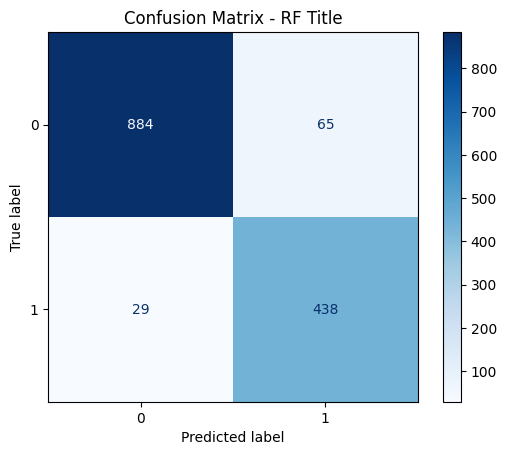

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_title_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_title_model.fit(X_title_train, y_title_train)

y_title_rf_pred = rf_title_model.predict(X_title_test)
y_title_train_rf_pred = rf_title_model.predict(X_title_train)
f1_score_rf_title = f1_score(y_title_test, y_title_rf_pred)


# print("Training Accuracy:", accuracy_score(y_title_train, y_title_train_rf_pred))
# print(classification_report(y_title_train, y_title_train_rf_pred))
print("Testing Accuracy:", accuracy_score(y_title_test, y_title_rf_pred))
print("F1_score:", f1_score_rf_title)
print("recall:", recall_score(y_title_test, y_title_rf_pred))
print("precision: ", precision_score(y_title_test, y_title_rf_pred))
print(classification_report(y_title_test, y_title_rf_pred))

cm = confusion_matrix(y_title_test, y_title_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix - RF Title")
plt.show()

In [ ]:
# prompt: buatkan learning curve dan cross validation dari algoritma random forest di atas (title)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import ShuffleSplit

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_title_model,
    X=X_title_train,
    y=y_title_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Adjust the number of training sizes
    cv=5,  # Adjust the number of cross-validation folds
    scoring='accuracy',  # Use appropriate scoring metric
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve - RF Title')
plt.legend(loc='best')
plt.grid(True)
plt.show()


#Validation Curve (example using n_estimators)
param_range = [50, 100, 200, 300] # Example parameter range, adjust as needed
train_scores, test_scores = validation_curve(
    rf_title_model, X_title_train, y_title_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label='Training score', color='blue')
plt.plot(param_range, test_mean, label='Cross-validation score', color='red')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')
plt.title('Validation Curve - RF Title (n_estimators)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

Logistic Regression

Accuracy: 0.9477401129943502
F1_score: 0.9204301075268817
recall: 0.9164882226980728
precision:  0.9244060475161987
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       949
           1       0.92      0.92      0.92       467

    accuracy                           0.95      1416
   macro avg       0.94      0.94      0.94      1416
weighted avg       0.95      0.95      0.95      1416



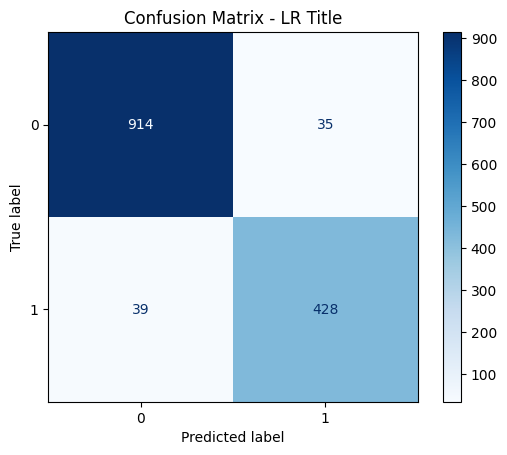

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_title_model = LogisticRegression(random_state=42)
lr_title_model.fit(X_title_train, y_title_train)

y_title_lr_pred = lr_title_model.predict(X_title_test)

f1_score_lr_title = f1_score(y_title_test, y_title_lr_pred)

print("Accuracy:", accuracy_score(y_title_test, y_title_lr_pred))
print("F1_score:", f1_score_lr_title)
print("recall:", recall_score(y_title_test, y_title_lr_pred))
print("precision: ", precision_score(y_title_test, y_title_lr_pred))
print(classification_report(y_title_test, y_title_lr_pred))

cm = confusion_matrix(y_title_test, y_title_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix - LR Title")
plt.show()

ANN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6582 - loss: 0.6461
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8931 - loss: 0.3397
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9626 - loss: 0.1399
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9767 - loss: 0.0871
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9870 - loss: 0.0601
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9484463276836158
F1_score: 0.9205658324265505
recall: 0.9057815845824411
precision:  0.9358407079646017
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       949
           1       0.94      0.91      0.92       467

    accuracy                           0.95      1416
   macro avg       0.95      0.94      0.94      1416
weighted avg       0.95      0.95      0.95      1416



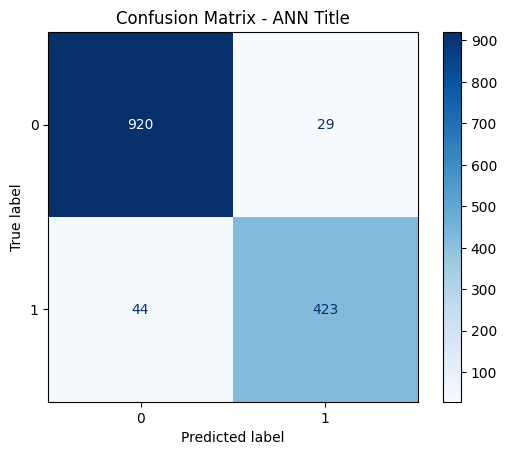

In [ ]:
# --- Build ANN Model ---
ann_title_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_title_train.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

ann_title_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train Model ---
history = ann_title_model.fit(X_title_train.toarray(), y_title_train,
                    epochs=5, batch_size=32)

# --- Predict ---
y_title_ann_pred = (ann_title_model.predict(X_title_test.toarray()) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_title_test, y_title_ann_pred))
f1_score_ann_title = f1_score(y_title_test, y_title_ann_pred)
print("F1_score:", f1_score_ann_title)
print("recall:", recall_score(y_title_test, y_title_ann_pred))
print("precision: ", precision_score(y_title_test, y_title_ann_pred))
print(classification_report(y_title_test, y_title_ann_pred))

cm = confusion_matrix(y_title_test, y_title_ann_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix - ANN Title")
plt.show()


#Fake News Detection Using News Text and Narration

In [ ]:
df_text = df.drop(['Title'], axis=1)
df_text.head()

,FullText,Hoax
0,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,Wakil Presiden Jusuf Kalla santai menanggapi k...,0
2,Seruan Habib Rizieq kepada umat muslim se-Indo...,1
3,Ketua Umum PDI Perjuangan Megawati Soekarnoput...,0
4,Anggota komisi II DPR RI dari fraksi Partai Go...,0


In [ ]:
df_text['FullText'] = df_text['FullText'].astype(str).apply(wordopt)
df_text.head()

,FullText,Hoax
0,dilihat si onta yaman peduli apa penting suara...,1
1,wakil presiden jusuf kalla santai menanggapi k...,0
2,seruan habib rizieq umat muslim se indonesia s...,1
3,ketua umum pdi perjuangan megawati soekarnoput...,0
4,anggota komisi ii dpr ri fraksi partai golkar ...,0


In [ ]:
X_text = df_text['FullText']
y_text = df_text['Hoax']

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

In [ ]:
X_text_train = vectorization.fit_transform(X_text_train)
X_text_test = vectorization.transform(X_text_test)

Random Forest

Testing Accuracy: 0.992231638418079
F1_score: 0.9881337648327939
recall: 0.9807280513918629
precision:  0.9956521739130435
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       1.00      0.98      0.99       467

    accuracy                           0.99      1416
   macro avg       0.99      0.99      0.99      1416
weighted avg       0.99      0.99      0.99      1416



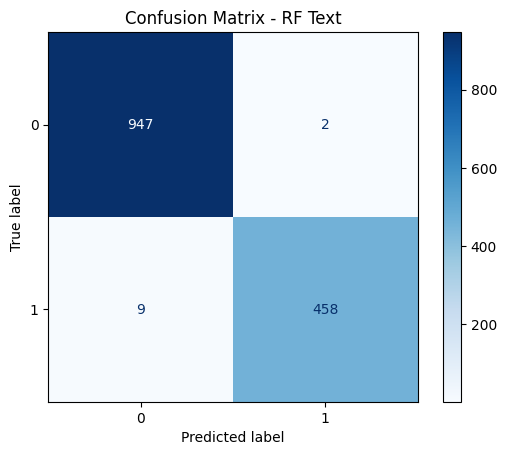

In [ ]:
rf_text_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_text_model.fit(X_text_train, y_text_train)

y_text_rf_pred = rf_text_model.predict(X_text_test)

print("Testing Accuracy:", accuracy_score(y_text_test, y_text_rf_pred))
f1_score_rf_text = f1_score(y_text_test, y_text_rf_pred)
print("F1_score:", f1_score_rf_text)
print("recall:", recall_score(y_text_test, y_text_rf_pred))
print("precision: ", precision_score(y_text_test, y_text_rf_pred))
print(classification_report(y_text_test, y_text_rf_pred))

cm = confusion_matrix(y_text_test, y_text_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix - RF Text")
plt.show()

Logistic Regression

Accuracy: 0.980225988700565
F1_score: 0.9694989106753813
recall: 0.9528907922912205
precision:  0.9866962305986696
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       949
           1       0.99      0.95      0.97       467

    accuracy                           0.98      1416
   macro avg       0.98      0.97      0.98      1416
weighted avg       0.98      0.98      0.98      1416



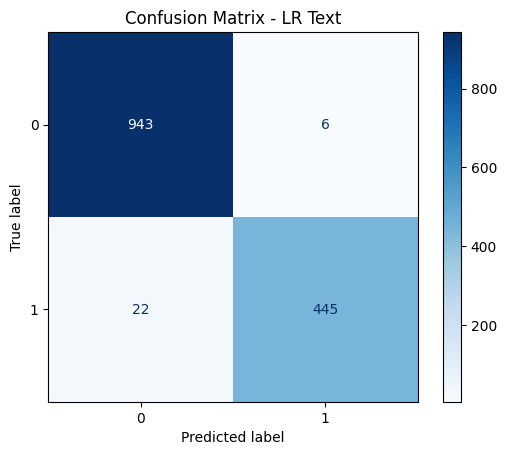

In [ ]:
lr_text_model = LogisticRegression(random_state=42)
lr_text_model.fit(X_text_train, y_text_train)

y_text_lr_pred = lr_text_model.predict(X_text_test)

print("Accuracy:", accuracy_score(y_text_test, y_text_lr_pred))
f1_score_lr_text = f1_score(y_text_test, y_text_lr_pred)
print("F1_score:", f1_score_lr_text)
print("recall:", recall_score(y_text_test, y_text_lr_pred))
print("precision: ", precision_score(y_text_test, y_text_lr_pred))
print(classification_report(y_text_test, y_text_lr_pred))

cm = confusion_matrix(y_text_test, y_text_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix - LR Text")
plt.show()

ANN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7400 - loss: 0.5806
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9647 - loss: 0.1730
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9838 - loss: 0.0690
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9921 - loss: 0.0395
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9977 - loss: 0.0230
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.990819209039548
F1_score: 0.9860064585575888
recall: 0.9807280513918629
precision:  0.9913419913419913
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.99      0.98      0.99       467

    accuracy                           0.99      1416
   macro avg       0.99      0.99      0.99      1416
weighted avg       0.99      0.99      0.99      1416



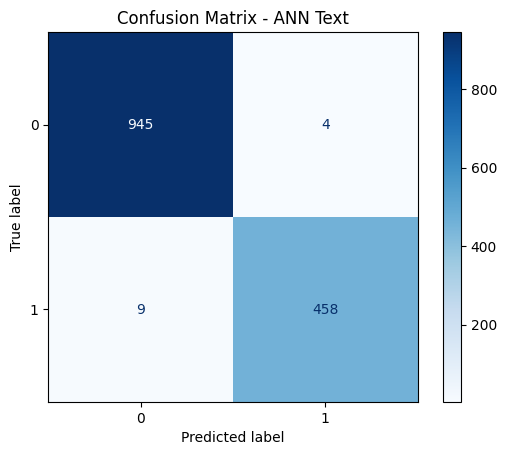

In [ ]:
ann_text_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_text_train.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ann_text_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train Model ---
history = ann_text_model.fit(X_text_train.toarray(), y_text_train,
                    epochs=5, batch_size=32)

# --- Predict ---
y_text_ann_pred = (ann_text_model.predict(X_text_test.toarray()) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_text_test, y_text_ann_pred))
f1_score_ann_text = f1_score(y_text_test, y_text_ann_pred)
print("F1_score:", f1_score_ann_text)
print("recall:", recall_score(y_text_test, y_text_ann_pred))
print("precision: ", precision_score(y_text_test, y_text_ann_pred))
print(classification_report(y_text_test, y_text_ann_pred))

# df.head()

cm = confusion_matrix(y_text_test, y_text_ann_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix - ANN Text")
plt.show()

#Evaluation

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


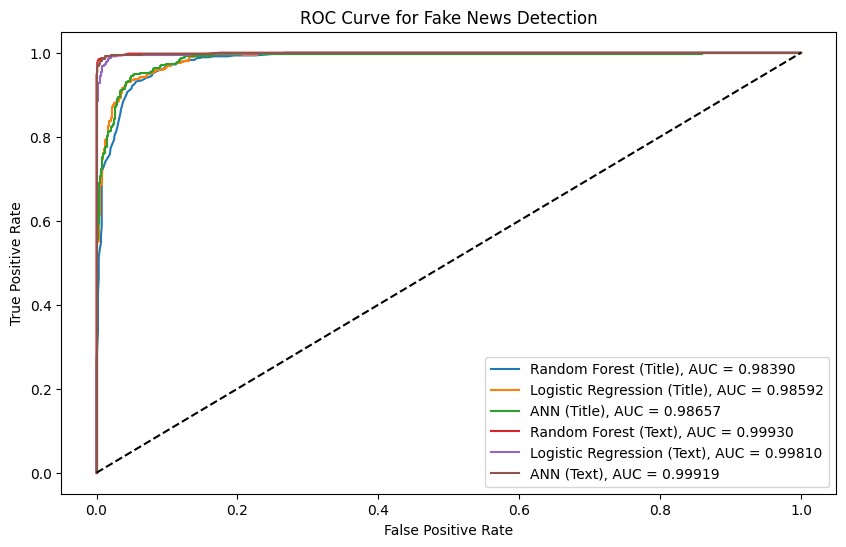

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.special import expit as sigmoid
# Calculate ROC curve and AUC for Random Forest (Title)
y_title_rf_probs = rf_title_model.predict_proba(X_title_test)[:, 1]
fpr_rf_title, tpr_rf_title, _ = roc_curve(y_title_test, y_title_rf_probs)
roc_auc_rf_title = auc(fpr_rf_title, tpr_rf_title)

# Calculate ROC curve and AUC for Logistic Regression (Title)
y_title_lr_probs = lr_title_model.predict_proba(X_title_test)[:, 1]
fpr_lr_title, tpr_lr_title, _ = roc_curve(y_title_test, y_title_lr_probs)
roc_auc_lr_title = auc(fpr_lr_title, tpr_lr_title)

# Calculate ROC curve and AUC for ANN (Title)
y_title_ann_probs = ann_title_model.predict(X_title_test)[:, 0]
y_title_ann_probs = sigmoid(y_title_ann_probs)
fpr_ann_title, tpr_ann_title, _ = roc_curve(y_title_test, y_title_ann_probs)
roc_auc_ann_title = auc(fpr_ann_title, tpr_ann_title)

# Calculate ROC curve and AUC for Random Forest (Text)
y_text_rf_probs = rf_text_model.predict_proba(X_text_test)[:, 1]
fpr_rf_text, tpr_rf_text, _ = roc_curve(y_text_test, y_text_rf_probs)
roc_auc_rf_text = auc(fpr_rf_text, tpr_rf_text)

# Calculate ROC curve and AUC for Logistic Regression (Text)
y_text_lr_probs = lr_text_model.predict_proba(X_text_test)[:, 1]
fpr_lr_text, tpr_lr_text, _ = roc_curve(y_text_test, y_text_lr_probs)
roc_auc_lr_text = auc(fpr_lr_text, tpr_lr_text)

# Calculate ROC curve and AUC for ANN (Text)
y_text_ann_probs = ann_text_model.predict(X_text_test)[:, 0]
y_text_ann_probs = sigmoid(y_text_ann_probs)
fpr_ann_text, tpr_ann_text, _ = roc_curve(y_text_test, y_text_ann_probs)
roc_auc_ann_text = auc(fpr_ann_text, tpr_ann_text)


# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_title, tpr_rf_title, label='Random Forest (Title), AUC = %0.5f' % roc_auc_rf_title)
plt.plot(fpr_lr_title, tpr_lr_title, label='Logistic Regression (Title), AUC = %0.5f' % roc_auc_lr_title)
plt.plot(fpr_ann_title, tpr_ann_title, label='ANN (Title), AUC = %0.5f' % roc_auc_ann_title)
plt.plot(fpr_rf_text, tpr_rf_text, label='Random Forest (Text), AUC = %0.5f' % roc_auc_rf_text)
plt.plot(fpr_lr_text, tpr_lr_text, label='Logistic Regression (Text), AUC = %0.5f' % roc_auc_lr_text)
plt.plot(fpr_ann_text, tpr_ann_text, label='ANN (Text), AUC = %0.5f' % roc_auc_ann_text)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake News Detection')
plt.legend(loc="lower right")
plt.show()


#experiment iseng-iseng di luar utama

In [ ]:
df_hehe = df.drop(['Title'], axis=1)

df_hehe.head()

,FullText,Hoax
0,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,Wakil Presiden Jusuf Kalla santai menanggapi k...,0
2,Seruan Habib Rizieq kepada umat muslim se-Indo...,1
3,Ketua Umum PDI Perjuangan Megawati Soekarnoput...,0
4,Anggota komisi II DPR RI dari fraksi Partai Go...,0


In [ ]:
def wordopt_no_stopword(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('  ', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_hehe['FullText'] = df_hehe['FullText'].apply(wordopt_no_stopword)
df_hehe.head()

,FullText,Hoax
0,bisa dilihat si onta yaman nggak peduli itu ap...,1
1,wakil presiden jusuf kalla santai menanggapi k...,0
2,seruan habib rizieq kepada umat muslim se indo...,1
3,ketua umum pdi perjuangan megawati soekarnoput...,0
4,anggota komisi ii dpr ri dari fraksi partai go...,0


In [ ]:
X_hehe = df_hehe['FullText']
y_hehe = df_hehe['Hoax']

In [ ]:
X_hehe_train, X_hehe_test, y_hehe_train, y_hehe_test = train_test_split(X_hehe, y_hehe, test_size=0.2, random_state=42)

In [ ]:
vectorization = TfidfVectorizer()
X_hehe_train = vectorization.fit_transform(X_hehe_train)
X_hehe_test = vectorization.transform(X_hehe_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_hehe_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_hehe_model.fit(X_hehe_train, y_hehe_train)

y_hehe_pred = rf_hehe_model.predict(X_hehe_test)

print("Accuracy:", accuracy_score(y_hehe_test, y_hehe_pred))
print(classification_report(y_hehe_test, y_hehe_pred))

Accuracy: 0.9872881355932204
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       1.00      0.96      0.98       467

    accuracy                           0.99      1416
   macro avg       0.99      0.98      0.99      1416
weighted avg       0.99      0.99      0.99      1416



In [ ]:
def output_lable(n):
    if n == 0:
      return "not hoax"
    elif n == 1:
      return "hoax"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    # Use the vectorization fitted on the full text data (X_hehe_train)
    new_xv_test = vectorization.transform(new_x_test)
    # Use the model trained on the full text data (rf_hehe_model)
    pred_RFC = rf_hehe_model.predict(new_xv_test)

    return print("RFC Prediction: {}".format(output_lable(pred_RFC[0])))

In [ ]:
news = 'Jakarta, CNBC Indonesia - Warga Indonesia akan menikmati libur panjang lagi pada awal Juni 2025. Libur panjang kali ini bertepatan dengan perayaan Hari Raya Idul Adha 1446 H. Menurut kalender Hijriyah, Idul Adha jatuh setiap tanggal 10 Zulhijah. Pemerintah melalui Kementerian Agama telah menetapkan Hari Raya Idul Adha jatuh pada Jumat, 6 Juni 2025. "Kita bisa menyimpulkan bahwa 1Dzulhijjah 1446 H jatuh pada Rabu 28 Mei 2025. Sehingga 10Dzulhijjah atau Idul Adha bertepatan pada 6 Juni 2025," kata Menteri Agama (Menag) RI Nasaruddin Umar dalam konferensi pers hasil Sidang Isbat di Kementerian Agama belum lama ini. Umat Islam yang merayakan Idul Fitri bisa menikmati long weekend karena Senin, 9 Juni ditetapkan sebagai cuti bersama Idul Adha. Long weekend ini juga bertepatan dengan Hari Tasyrik. Tasyrik berasal dari kata "syarraqa" yang berarti menjemur atau menjemur daging kurban. Pada hari-hari Tasyrik, umat Islam dilarang berpuasa dan dianjurkan untuk memperbanyak dzikir, takbir, dan tahmid. Selain itu, umat Islam juga dianjurkan untuk menikmati hidangan dan olahan daging kurban. Libur panjang Idul Adha 2025 Jumat, 6 Juni: Hari Raya Idul Adha Sabtu, 7 Juni: libur akhir pekan Minggu, 8 Juni: libur akhir pekan Senin, 9 Juni: cuti bersama Idul Adha Libur tanggal merah dan cuti bersama Juni 2025 Minggu, 1 Juni: Libur nasional Hari Lahir Pancasila Jumat, 6 Juni: Libur nasional Iduladha 1446 Hijriah Senin, 9 Juni: Cuti bersama Iduladha 1446 Hijriah Jumat, 27 Juni: Libur nasional Tahun Baru Islam 1447 Hijriah'
manual_testing(news)

RFC Prediction: hoax
